In [1]:
pip install mapclassify==2.4.3

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip uninstall shapely geopandas

Found existing installation: Shapely 1.6.4.post2
Uninstalling Shapely-1.6.4.post2:
  Would remove:
    /opt/conda/lib/python3.7/site-packages/Shapely-1.6.4.post2.dist-info/*
    /opt/conda/lib/python3.7/site-packages/shapely/*
  Would not remove (might be manually added):
    /opt/conda/lib/python3.7/site-packages/shapely/_enum.py
    /opt/conda/lib/python3.7/site-packages/shapely/_geometry.py
    /opt/conda/lib/python3.7/site-packages/shapely/_geometry_helpers.cpython-37m-x86_64-linux-gnu.so
    /opt/conda/lib/python3.7/site-packages/shapely/_geos.cpython-37m-x86_64-linux-gnu.so
    /opt/conda/lib/python3.7/site-packages/shapely/_geos.pxd
    /opt/conda/lib/python3.7/site-packages/shapely/_pygeos_api.pxd
    /opt/conda/lib/python3.7/site-packages/shapely/_ragged_array.py
    /opt/conda/lib/python3.7/site-packages/shapely/_version.py
    /opt/conda/lib/python3.7/site-packages/shapely/algorithms/_oriented_envelope.py
    /opt/conda/lib/python3.7/site-packages/shapely/constructive.py
   

In [ ]:
#pip install shapely --no-binary shapely


In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#SEI

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /

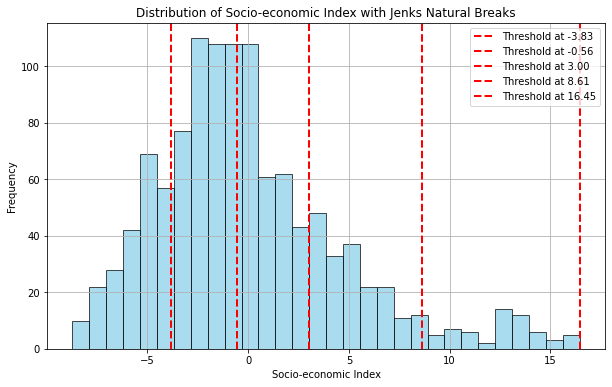

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify  # Make sure you have installed this package

# Load the Excel data containing the HAI_Index
excel_path = 'SEC_INDEX.CSV'  # Update the path to your new Excel file
data = pd.read_csv(excel_path)

# Calculate Jenks natural breaks for HAI_Index
classifier = mapclassify.NaturalBreaks(data['SEC_Index4'], k=5)

# Plotting the histogram of the HAI_Index
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['SEC_Index4'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Adding Jenks natural breaks as vertical lines
for threshold in classifier.bins:
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold at {threshold:.2f}')

# Enhance display
# Ensure legends are not duplicated
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Distribution of Socio-economic Index with Jenks Natural Breaks')
plt.xlabel('Socio-economic Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
import numpy as np
import mapclassify

# Load the shapefile and Excel data
shapefile_path = 'mo_county.shp'
excel_path = 'Modified_SEC_INDEX.CSV'  # Assuming this is correct as per your setup
mo_counties = gpd.read_file(shapefile_path)
excel_data = pd.read_csv(excel_path)

# Ensure that the 'COUNTYFIPS' columns are integers for a proper join
mo_counties['COUNTYFIPS'] = mo_counties['COUNTYFIPS'].astype(int)
excel_data['countyfips'] = excel_data['countyfips'].astype(int)

# Join the data on the 'COUNTYFIPS' column
merged_data = mo_counties.merge(excel_data, left_on='COUNTYFIPS', right_on='countyfips', how='left')

# Use Jenks Natural Breaks to classify the data into 5 clusters based on 'HAI_Index'
classifier = mapclassify.NaturalBreaks(merged_data['SEC_Index4'], k=5)  # Update to 5 clusters
merged_data['Cluster'] = classifier.yb

# Define the colors for each class, adjust for 5 classes
colors = ['#CC0000', '#fc8d59', '#add8e6', '#6495ed', '#00008b']  # Expanded color palette
cmap = matplotlib.colors.ListedColormap(colors)

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_data.plot(column='Cluster', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=classifier.k-1))
sm._A = []  # Array of data values to map colors to
cbar = fig.colorbar(sm, ax=ax, boundaries=np.arange(-0.5, classifier.k), ticks=np.arange(0, classifier.k))

# Add legend with the class labels
cbar.set_ticklabels(['Very Low', 'Low', 'Moderate', 'High', 'Very High'])  # Adjusted for 5 classes

# Remove axis
ax.axis('off')

# Add title
plt.title('Socio-economic Index by County')

# Show the plot
plt.show()


In [ ]:
##COMORBIDITIES

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /

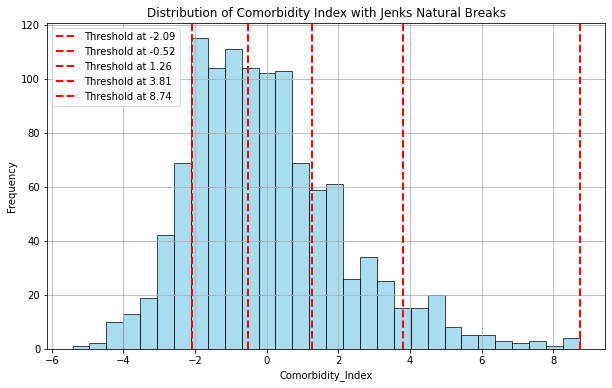

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify  # Make sure you have installed this package

# Load the Excel data containing the HAI_Index
excel_path = 'Comorbidity_index.csv'  # Update the path to your new Excel file
data = pd.read_csv(excel_path)

# Calculate Jenks natural breaks for HAI_Index
classifier = mapclassify.NaturalBreaks(data['comorbidity_Index4'], k=5)

# Plotting the histogram of the HAI_Index
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['comorbidity_Index4'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Adding Jenks natural breaks as vertical lines
for threshold in classifier.bins:
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold at {threshold:.2f}')

# Enhance display
# Ensure legends are not duplicated
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Distribution of Comorbidity Index with Jenks Natural Breaks')
plt.xlabel('Comorbidity_Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /

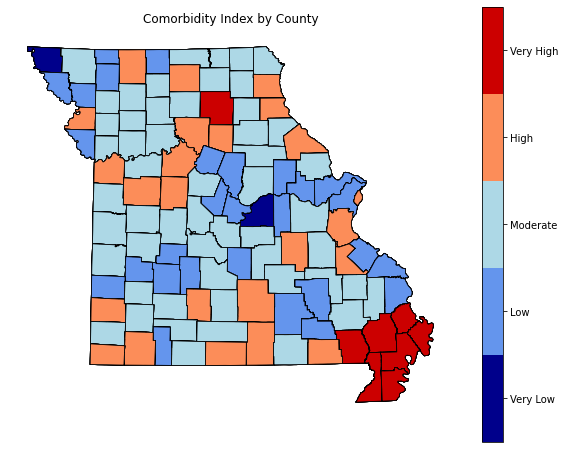

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
import numpy as np
import mapclassify

# Load the shapefile and Excel data
shapefile_path = 'mo_county.shp'
excel_path = 'Modified_COM_INDEX.CSV'  # Assuming this is correct as per your setup
mo_counties = gpd.read_file(shapefile_path)
excel_data = pd.read_csv(excel_path)

# Ensure that the 'COUNTYFIPS' columns are integers for a proper join
mo_counties['COUNTYFIPS'] = mo_counties['COUNTYFIPS'].astype(int)
excel_data['countyfips'] = excel_data['countyfips'].astype(int)

# Join the data on the 'COUNTYFIPS' column
merged_data = mo_counties.merge(excel_data, left_on='COUNTYFIPS', right_on='countyfips', how='left')

# Use Jenks Natural Breaks to classify the data into 5 clusters based on 'HAI_Index'
classifier = mapclassify.NaturalBreaks(merged_data['comorbidity_Index4'], k=5)  # Update to 5 clusters
merged_data['Cluster'] = classifier.yb

# Define the colors for each class, adjust for 5 classes
colors = ['#00008b', '#6495ed', '#add8e6', '#fc8d59', '#CC0000']  # Expanded color palette
cmap = matplotlib.colors.ListedColormap(colors)

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_data.plot(column='Cluster', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=classifier.k-1))
sm._A = []  # Array of data values to map colors to
cbar = fig.colorbar(sm, ax=ax, boundaries=np.arange(-0.5, classifier.k), ticks=np.arange(0, classifier.k))

# Add legend with the class labels
cbar.set_ticklabels(['Very Low', 'Low', 'Moderate', 'High', 'Very High'])  # Adjusted for 5 classes

# Remove axis
ax.axis('off')

# Add title
plt.title('Comorbidity Index by County')

# Show the plot
plt.show()


In [ ]:
##HAI

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /

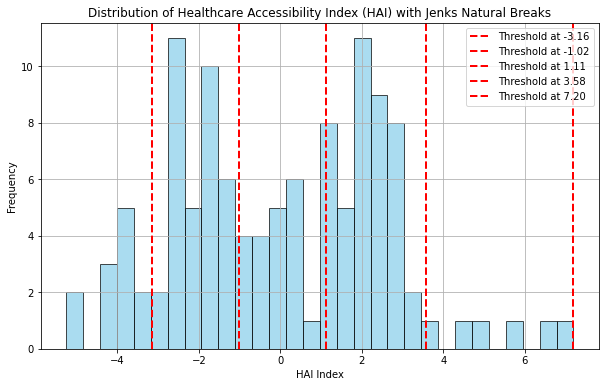

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify  # Make sure you have installed this package

# Load the Excel data containing the HAI_Index
excel_path = 'saa_index.csv'  # Update the path to your new Excel file
data = pd.read_csv(excel_path)

# Calculate Jenks natural breaks for HAI_Index
classifier = mapclassify.NaturalBreaks(data['HAI_Index'], k=5)

# Plotting the histogram of the HAI_Index
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['HAI_Index'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Adding Jenks natural breaks as vertical lines
for threshold in classifier.bins:
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold at {threshold:.2f}')

# Enhance display
# Ensure legends are not duplicated
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Distribution of Healthcare Accessibility Index (HAI) with Jenks Natural Breaks')
plt.xlabel('HAI Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /

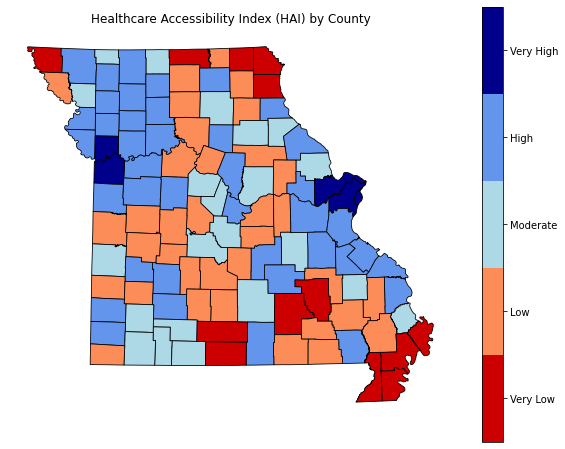

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
import numpy as np
import mapclassify

# Load the shapefile and Excel data
shapefile_path = 'mo_county.shp'
excel_path = 'saa_index.csv'  # Assuming this is correct as per your setup
mo_counties = gpd.read_file(shapefile_path)
excel_data = pd.read_csv(excel_path)

# Ensure that the 'COUNTYFIPS' columns are integers for a proper join
mo_counties['COUNTYFIPS'] = mo_counties['COUNTYFIPS'].astype(int)
excel_data['countyfips'] = excel_data['countyfips'].astype(int)

# Join the data on the 'COUNTYFIPS' column
merged_data = mo_counties.merge(excel_data, left_on='COUNTYFIPS', right_on='countyfips', how='left')

# Use Jenks Natural Breaks to classify the data into 5 clusters based on 'HAI_Index'
classifier = mapclassify.NaturalBreaks(merged_data['HAI_Index'], k=5)  # Update to 5 clusters
merged_data['Cluster'] = classifier.yb

# Define the colors for each class, adjust for 5 classes
colors = ['#CC0000', '#fc8d59', '#add8e6', '#6495ed', '#00008b']  # Expanded color palette
cmap = matplotlib.colors.ListedColormap(colors)

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_data.plot(column='Cluster', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=classifier.k-1))
sm._A = []  # Array of data values to map colors to
cbar = fig.colorbar(sm, ax=ax, boundaries=np.arange(-0.5, classifier.k), ticks=np.arange(0, classifier.k))

# Add legend with the class labels
cbar.set_ticklabels(['Very Low', 'Low', 'Moderate', 'High', 'Very High'])  # Adjusted for 5 classes

# Remove axis
ax.axis('off')

# Add title
plt.title('Healthcare Accessibility Index (HAI) by County')

# Show the plot
plt.show()


In [ ]:
IndexbasedCountyRanking2019

In [2]:
import pandas as pd

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [15]:
rank_df = pd.read_csv('IndexbasedCountyRanking2019_1.csv')

In [16]:
rank_df['COUNTYFIPS'] = rank_df['LocationID'].astype(str).str[2:]
rank_df['COUNTYFIPS']

0      001
1      003
2      005
3      007
4      009
      ... 
110    221
111    223
112    225
113    227
114    229
Name: COUNTYFIPS, Length: 115, dtype: object

In [17]:
rank_df['COUNTYFIPS'] = rank_df['COUNTYFIPS'].astype(int)

In [25]:
dict(rank_df.groupby('Class_kmeans')['Geographic Area Name_x'].unique())

{0.0: array(['Atchison County, Missouri', 'Audrain County, Missouri',
        'Barton County, Missouri', 'Benton County, Missouri',
        'Bollinger County, Missouri', 'Carter County, Missouri',
        'Cedar County, Missouri', 'Clark County, Missouri',
        'Dade County, Missouri', 'Dallas County, Missouri',
        'Douglas County, Missouri', 'Gasconade County, Missouri',
        'Hickory County, Missouri', 'Holt County, Missouri',
        'Iron County, Missouri', 'Knox County, Missouri',
        'Mercer County, Missouri', 'Monroe County, Missouri',
        'Montgomery County, Missouri', 'Morgan County, Missouri',
        'Oregon County, Missouri', 'Osage County, Missouri',
        'Ozark County, Missouri', 'Putnam County, Missouri',
        'Reynolds County, Missouri', 'Ripley County, Missouri',
        'Schuyler County, Missouri', 'Scotland County, Missouri',
        'Shannon County, Missouri', 'Shelby County, Missouri',
        'St. Clair County, Missouri', 'Stone County, Mi

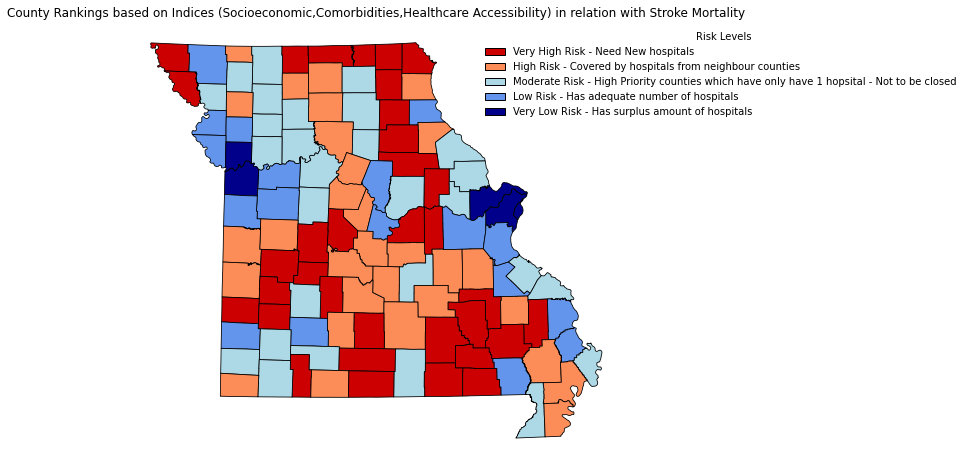

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

# Load the data and merge as necessary
shapefile_path = 'mo_county.shp'
mo_counties = gpd.read_file(shapefile_path)
mo_counties['COUNTYFIPS'] = mo_counties['COUNTYFIPS'].astype(int)

# Assuming rank_df is defined somewhere else and contains a 'COUNTYFIPS' column
rank_df['COUNTYFIPS'] = rank_df['COUNTYFIPS'].astype(int)
merged_data = mo_counties.merge(rank_df, left_on='COUNTYFIPS', right_on='COUNTYFIPS', how='left')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
colors = ['#CC0000', '#fc8d59', '#add8e6', '#6495ed', '#00008b']
cmap = mcolors.ListedColormap(colors)
merged_data.plot(column='Class_kmeans', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black')
ax.axis('off')
plt.title('County Rankings based on Indices (Socioeconomic,Comorbidities,Healthcare Accessibility) in relation with Stroke Mortality')

# Legend
legend_labels = ['Very High Risk - Need New hospitals', 'High Risk - Covered by hospitals from neighbour counties', 
                 'Moderate Risk - High Priority counties which have only have 1 hopsital - Not to be closed  ',
                 'Low Risk - Has adequate number of hospitals', 'Very Low Risk - Has surplus amount of hospitals']
legend_handles = [Patch(facecolor=color, edgecolor='black') for color in colors]

# Use bbox_to_anchor to move the legend more to the right outside the plot
# The first value pushes the legend right (1.0 is at the edge, >1.0 is outside the plot)
# The second value lifts the legend up (0.5 is centered, >0.5 moves it up)
ax.legend(handles=legend_handles, labels=legend_labels, title="Risk Levels",
          loc='upper left', bbox_to_anchor=(0.7, 1), frameon=False)

plt.show()
